In [1]:
#importing models
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
from matplotlib import rcParams
#importing sklearn models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from path import Path

In [2]:

import warnings
warnings.filterwarnings("ignore")

In [3]:
# defining data path
data_path=Path('resources/Cleaned_folder/asthma.csv')
# Reading data source using pandas
asthma_df=pd.read_csv(data_path)

In [4]:
# defining data path
air_path=Path('resources/Pollution_day_2001-2016.csv')
# Reading data source using pandas
air_df=pd.read_csv(air_path)

In [5]:
air_df

,Date Local,State,County,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,2000-01-01,Arizona,Maricopa,73.500000,33.500000,8.000000,20.0
1,2000-01-01,Arizona,Pima,36.000000,33.000000,6.000000,8.0
2,2000-01-01,California,Contra Costa,21.750000,21.000000,4.000000,10.5
3,2000-01-01,California,Imperial,23.000000,35.000000,4.000000,9.0
4,2000-01-01,California,Los Angeles,41.333333,22.333333,2.666667,34.0
...,...,...,...,...,...,...,...
326749,2016-05-31,Alabama,Jefferson,32.000000,48.000000,31.000000,6.0
326750,2016-05-31,Iowa,Polk,15.000000,40.000000,0.000000,3.0
326751,2016-05-31,Iowa,Scott,10.000000,39.000000,0.000000,2.0
326752,2016-05-31,Maine,Cumberland,10.000000,40.000000,0.000000,3.0


In [6]:
#cleaning air quality dataframe
air_ca_df=air_df[air_df['State']=='California']

In [7]:
air_ca_df['Date Local'] = pd.to_datetime(air_ca_df['Date Local'])

In [8]:
start_date = '2009-01-01'
end_date = '2012-12-31'
air_ca_df = air_ca_df[(air_ca_df['Date Local'] > start_date) & (air_ca_df['Date Local'] <= end_date)]

In [9]:
air_ca_df['Year']=air_ca_df['Date Local'].dt.year

In [10]:
air_ca_df.drop(columns=['Date Local'], inplace=True)

In [11]:
air_ca_df['County']=air_ca_df['County'].str.capitalize()

In [12]:
air_final=air_ca_df.groupby(['Year','County']).agg(['mean', 'max','min']).reset_index()

In [13]:
air_final.columns = air_final.columns.map('_'.join)

In [14]:
air_final.rename(columns={'Year_':'Year',
                         'County_':'County'}, inplace=True)

In [15]:
air_final

,Year,County,NO2 AQI_mean,NO2 AQI_max,NO2 AQI_min,O3 AQI_mean,O3 AQI_max,O3 AQI_min,SO2 AQI_mean,SO2 AQI_max,SO2 AQI_min,CO AQI_mean,CO AQI_max,CO AQI_min
0,2009,Alameda,21.958791,47.000000,4.000000,20.997253,46.000000,2.000000,3.450549,23.000000,0.000000,5.678571,23.000000,1.000000
1,2009,Contra costa,14.680861,35.000000,3.500000,32.298077,139.500000,7.500000,2.885073,11.500000,0.000000,3.919872,9.333333,1.500000
2,2009,Fresno,26.579670,66.000000,7.000000,52.384615,172.000000,5.000000,3.431319,19.000000,0.000000,6.560440,24.000000,1.000000
3,2009,Humboldt,8.111111,37.000000,0.000000,23.938889,46.000000,7.000000,0.688889,37.000000,0.000000,4.444444,15.000000,1.000000
4,2009,Imperial,31.584958,91.000000,3.000000,38.715877,119.000000,3.000000,2.846797,14.000000,0.000000,15.579387,81.000000,5.000000
5,2009,Los angeles,35.261355,79.428571,8.500000,33.162225,89.000000,4.750000,3.366889,10.000000,0.000000,8.503480,21.714286,1.750000
6,2009,Orange,23.619444,63.000000,0.000000,35.288889,90.000000,5.000000,2.763889,13.000000,0.000000,5.194444,25.000000,0.000000
7,2009,Riverside,29.683432,77.000000,2.000000,51.352071,161.000000,2.000000,3.065089,16.000000,1.000000,6.736527,22.000000,0.000000
8,2009,Sacramento,20.202839,48.000000,3.000000,38.684066,145.500000,4.500000,1.278388,4.000000,0.000000,6.674451,25.500000,2.000000
9,2009,San bernardino,34.701923,70.000000,10.500000,51.644231,145.000000,11.000000,2.131868,22.000000,0.000000,5.579670,13.500000,1.000000


In [16]:
asthma_df.columns

Index(['Year', 'Zip_code', 'County', 'Lat', 'Lng', 'Age_group',
       'Number_of_visits', 'Age-adjusted-rate', 'County-fips-code'],
      dtype='object')

In [17]:
final_asthma_df=asthma_df.groupby(['Year','County','Age_group'])['Number_of_visits', 'Age-adjusted-rate'].mean().reset_index()

In [18]:
final_asthma_df

,Year,County,Age_group,Number_of_visits,Age-adjusted-rate
0,2009,Alameda,Adults,146.217391,57.952969
1,2009,Alameda,Child,162.304348,86.870905
2,2009,Amador,Adults,16.400000,33.469355
3,2009,Amador,Child,16.500000,40.518229
4,2009,Butte,Adults,88.888889,64.690314
...,...,...,...,...,...
221,2012,Ventura,Child,50.521739,46.326087
222,2012,Yolo,Adults,78.812500,45.656250
223,2012,Yolo,Child,29.500000,48.900000
224,2012,Yuba,Adults,45.200000,42.720000


In [19]:
final_df=final_asthma_df.merge(air_final, how='inner', on=['Year', 'County'])

In [20]:
final_df

,Year,County,Age_group,Number_of_visits,Age-adjusted-rate,NO2 AQI_mean,NO2 AQI_max,NO2 AQI_min,O3 AQI_mean,O3 AQI_max,O3 AQI_min,SO2 AQI_mean,SO2 AQI_max,SO2 AQI_min,CO AQI_mean,CO AQI_max,CO AQI_min
0,2009,Alameda,Adults,146.217391,57.952969,21.958791,47.000000,4.000000,20.997253,46.00,2.000000,3.450549,23.000000,0.000000,5.678571,23.000000,1.000000
1,2009,Alameda,Child,162.304348,86.870905,21.958791,47.000000,4.000000,20.997253,46.00,2.000000,3.450549,23.000000,0.000000,5.678571,23.000000,1.000000
2,2009,Contra costa,Adults,129.277778,56.074682,14.680861,35.000000,3.500000,32.298077,139.50,7.500000,2.885073,11.500000,0.000000,3.919872,9.333333,1.500000
3,2009,Contra costa,Child,134.527778,66.637391,14.680861,35.000000,3.500000,32.298077,139.50,7.500000,2.885073,11.500000,0.000000,3.919872,9.333333,1.500000
4,2009,Fresno,Adults,79.390244,47.221375,26.579670,66.000000,7.000000,52.384615,172.00,5.000000,3.431319,19.000000,0.000000,6.560440,24.000000,1.000000
5,2009,Fresno,Child,125.036585,87.821980,26.579670,66.000000,7.000000,52.384615,172.00,5.000000,3.431319,19.000000,0.000000,6.560440,24.000000,1.000000
6,2009,Humboldt,Adults,55.444444,77.700310,8.111111,37.000000,0.000000,23.938889,46.00,7.000000,0.688889,37.000000,0.000000,4.444444,15.000000,1.000000
7,2009,Humboldt,Child,47.777778,67.196600,8.111111,37.000000,0.000000,23.938889,46.00,7.000000,0.688889,37.000000,0.000000,4.444444,15.000000,1.000000
8,2009,Imperial,Adults,78.777778,99.638590,31.584958,91.000000,3.000000,38.715877,119.00,3.000000,2.846797,14.000000,0.000000,15.579387,81.000000,5.000000
9,2009,Imperial,Child,131.055556,154.205008,31.584958,91.000000,3.000000,38.715877,119.00,3.000000,2.846797,14.000000,0.000000,15.579387,81.000000,5.000000


In [21]:
df=final_df[['Age_group', 'Number_of_visits', 'Age-adjusted-rate',
       'NO2 AQI_mean', 'NO2 AQI_max', 'NO2 AQI_min', 'O3 AQI_mean',
       'O3 AQI_max', 'O3 AQI_min', 'SO2 AQI_mean', 'SO2 AQI_max',
       'SO2 AQI_min', 'CO AQI_mean', 'CO AQI_max', 'CO AQI_min']]

In [22]:
df_dummies=pd.get_dummies(df)

In [23]:
# create feature matrix (X)
#selecting all columns except 'Age-adjusted-rate'
X=df_dummies.drop('Age-adjusted-rate', axis=1) 

# create response vector (y)
##selecting 'Age-adjusted-rate'
y=df_dummies['Age-adjusted-rate'].values  

#### Splitting data in train and test set

In [24]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
#Also using train_index and test_index to get train and test data index 
X_train, X_test, y_train, y_test = train_test_split(
                               X, y, test_size=0.2, random_state=42)

In [25]:
print(f'Shape of X_train={X_train.shape}')
print(f'Shape of X_test={X_test.shape}')
print(f'Shape of y_train={y_train.shape}')
print(f'Shape of X_test={y_test.shape}')

Shape of X_train=(43, 15)
Shape of X_test=(11, 15)
Shape of y_train=(43,)
Shape of X_test=(11,)


#### Scaling using standard scaler on feature matrix (X) 

In [26]:
#Different columns have differnt scale so standrazied it 
#features scaling using standard scaler on x only
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_X_train=std_scaler.fit_transform(X_train)
scaled_X_test=std_scaler.transform(X_test)

In [27]:
#shape of the X and y
print(scaled_X_train.shape)
print(y.shape)

(43, 15)
(54,)


### Evaluation Metric

To evaluate a model, we also need an **evaluation metric:**

- A numeric calculation used to **quantify** the performance of a model.
- The appropriate metric depends on the **goals** of your problem.

The most common choices for regression problems are:

- **R-squared**: The percentage of variation explained by the model (a "reward function," as higher is better).
- **Mean squared error**: The average squared distance between the prediction and the correct answer (a "loss function," as lower is better).
- **Mean absolute error**: The average absolute distance between the prediction and the correct answer (a "loss function," as lower is better).

In this case, we'll use mean squared error, R2, and mean absolute error because it is more interpretable in a predictive context.

## Linear Regression

In [28]:
#using linear regression
# Make a linear regression instance
lr=LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(scaled_X_train, y_train)


LinearRegression()

In [29]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing  set  {lr.score(scaled_X_test, y_test)}')

R2 Score of training set 0.6822454663437838
R2 Score of testing  set  -3.987972333112822


#### Create a cross-valiation with five folds.
-  Cross valiation allows the training set into distinct subsets called folds.
- A model is trained using k-1 of the folds as training data

In [30]:
#score of training set using cross_val_score
cross_val_score(lr, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

array([-24.66473321, -13.43193043, -23.36322709, -30.15251969,
       -17.18932516])

In [31]:
#score of training set using cross_val_score
lr_r2=np.mean(cross_val_score(lr, scaled_X_train, y_train, cv=5))
print(f'The R2 of Linear Regression is {lr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_mse=np.mean(cross_val_score(lr, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_rmse=np.sqrt(-(lr_mse))
print(f'The mean squared error of Linear Regression is {lr_rmse}')

#mean absolute error
lr_mae=np.mean(cross_val_score(lr, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_mae=(-(lr_mae))
print(f'The mean absolute error of Linear Regression is {lr_mae}')

The R2 of Linear Regression is -0.5809992320528636
The mean squared error of Linear Regression is 28.26593194027227
The mean absolute error of Linear Regression is 21.760347114976973


## Ridge Regression

In [32]:
#using ridge regression(ridge make some features going to near zero)
#alpha=0 no regularization( all features are used)
# Make a ridge regression instance
lr_r=Ridge()
lr_r.fit(scaled_X_train, y_train)


Ridge()

In [33]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr_r.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {lr_r.score(scaled_X_test, y_test)}')

R2 Score of training set 0.6703586938044399
R2 Score of testing set  -2.0071090026830145


#### Create a cross-valiation with five folds.

In [34]:
#score of training set using cross_val_score
cross_val_score(lr_r, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-38.36536122, -20.24447373, -21.24705914])

In [35]:
#score of training set using cross_val_score
lr_r_r2=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5))
print(f'The R2 of Ridge Regression is {lr_r_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_r_mse=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_r_rmse=np.sqrt(-(lr_r_mse))
print(f'The mean squared error of Ridge Regression is {lr_r_rmse}')

#mean absolute error
lr_r_mae=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_r_mae=(-(lr_r_mae))
print(f'The mean absolute error of Ridge Regression is {lr_r_mae}')

The R2 of Ridge Regression is -0.2864445791479223
The mean squared error of Ridge Regression is 26.28486837049156
The mean absolute error of Ridge Regression is 19.099602493183433


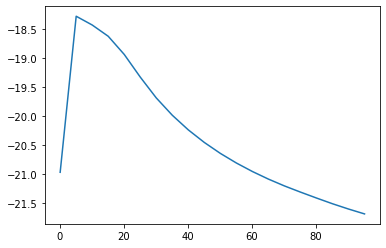

In [36]:
#choosing the best alpha
alpha=[]
error=[]
for i in range(1,1000,50):
    alpha.append(i/10)
    lrr=Ridge(alpha=(i/10))
    error.append(np.mean(cross_val_score(lrr, scaled_X_train, y_train, scoring='neg_mean_absolute_error',
                                         cv=5)))
plt.plot(alpha,error) 
plt.show()

In [37]:
#choosing the best alpha (look figure where alpha start to saturate)
lrr=Ridge(alpha=10)
lrr.fit(X_train, y_train)


Ridge(alpha=10)

In [38]:
#Printing the R2 score of test and train set 
print(f'R2 Score of training set with alpha 40 {lrr.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set with alpha 40 {lrr.score(scaled_X_test, y_test)}')

R2 Score of training set with alpha 40 -1.2524977002086883
R2 Score of testing set with alpha 40 -3.8169830092471404


#### Create a cross-valiation with five folds.

In [39]:
#score of training set using cross_val_score
cross_val_score(lr_r, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-38.36536122, -20.24447373, -21.24705914])

In [40]:
#score of training set using cross_val_score
lrr_r2=np.mean(cross_val_score(lrr, scaled_X_train, y_train, cv=5))
print(f'The R2 of Ridge Regression with alpha 10 is {lrr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lrr_mse=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lrr_rmse=np.sqrt(-(lrr_mse))
print(f'The mean squared error of Ridge Regression with alpha 10 is {lrr_rmse}')

#mean absolute error
lrr_mae=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lrr_mae=(-(lrr_mae))
print(f'The mean absolute error of Ridge Regression with alpha 10 is {lrr_mae}')

The R2 of Ridge Regression with alpha 10 is 0.051993212366118466
The mean squared error of Ridge Regression with alpha 10 is 26.28486837049156
The mean absolute error of Ridge Regression with alpha 10 is 19.099602493183433


## Laso Regression

In [41]:
#using lassoregression(lasso make some features going to exactly zero)
#alpha=0 no regularization( all features are used)
# Make a lasso regression instance
lr_l=Lasso()
lr_l.fit(scaled_X_train, y_train)


Lasso()

In [42]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr_l.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {lr_l.score(scaled_X_test, y_test)}')

R2 Score of training set 0.6266203953125098
R2 Score of testing set  -0.6120814146050293


#### Create a cross-valiation with five folds.

In [43]:
#score of training set using cross_val_score
cross_val_score(lr_l, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-36.32732189, -17.74026712, -19.54179147])

In [44]:
#score of training set using cross_val_score
lr_l_r2=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5))
print(f'The R2 of Lasso Regression is {lr_l_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_l_mse=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_l_rmse=np.sqrt(-(lr_l_mse))
print(f'The mean squared error of Lasso Regression is {lr_l_rmse}')

#mean absolute error
lr_l_mae=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_l_mae=(-(lr_l_mae))
print(f'The mean absolute error of Lasso Regression is {lr_l_mae}')

The R2 of Lasso Regression is -0.16776166021594457
The mean squared error of Lasso Regression is 25.824949712300278
The mean absolute error of Lasso Regression is 18.767181927188933


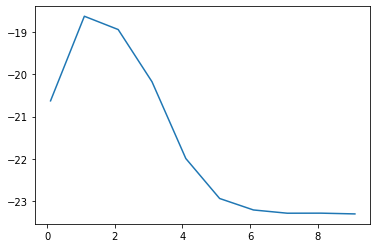

In [45]:
#choosing the best alpha
alpha=[]
error=[]
for i in range(1,100,10):
    alpha.append(i/10)
    lrl=Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lrl, scaled_X_train, y_train, scoring='neg_mean_absolute_error',
                                         cv=5)))
plt.plot(alpha,error) 
plt.show()

In [46]:
#choosing the best alpha
lrl=Lasso(alpha=10)
lrl.fit(scaled_X_train, y_train)


Lasso(alpha=10)

In [47]:
#Printing the R2 score of test and train set 
print(f'R2 Score of training set with alpha 10 {lrl.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set with alpha 10 {lrl.score(scaled_X_test, y_test)}')

R2 Score of training set with alpha 10 0.1931649866659153
R2 Score of testing set with alpha 10 0.12176879858457457


#### Create a cross-valiation with five folds.

In [48]:
#score of training set using cross_val_score
cross_val_score(lr_l, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-36.32732189, -17.74026712, -19.54179147])

In [49]:
#score of training set using cross_val_score
lrl_r2=np.mean(cross_val_score(lrl, scaled_X_train, y_train, cv=5))
print(f'The R2 of Lasso Regression with alpha 10 is {lrl_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lrl_mse=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lrl_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Lasso Regression with alpha 10 is {lrl_rmse}')

#mean absolute error
lrl_mae=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lrl_mae=(-(lrl_mae))
print(f'The mean absolute error of Lasso Regressionwith alpha 10 is {lrl_mae}')

The R2 of Lasso Regression with alpha 10 is -0.11636642959125984
The mean squared error of Lasso Regression with alpha 10 is 25.824949712300278
The mean absolute error of Lasso Regressionwith alpha 10 is 18.767181927188933


## Support Vector Machine(SVM) Regression

In [50]:
# Make a svm regression instance
svm=LinearSVR(epsilon=1.5)
svm.fit(scaled_X_train, y_train)


LinearSVR(epsilon=1.5)

In [51]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {svm.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {svm.score(scaled_X_test, y_test)}')

R2 Score of training set -0.44370681956504776
R2 Score of testing set  -0.407567983210007


#### Create a cross-valiation with five folds.

In [52]:
#score of training set using cross_val_score
cross_val_score(svm, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-64.67020559, -36.4204869 , -32.78269764])

In [53]:
#score of training set using cross_val_score
svm_r2=np.mean(cross_val_score(svm, scaled_X_train, y_train, cv=5))
print(f'The R2 of svm Regression is {svm_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
svm_mse=np.mean(cross_val_score(svm, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
svm_rmse=np.sqrt(-(svm_mse))
print(f'The mean squared error of svm Regression is {svm_rmse}')

#mean absolute error
svm_mae=np.mean(cross_val_score(svm, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
svm_mae=(-(svm_mae))
print(f'The mean absolute error of svm Regression is {svm_mae}')

The R2 of svm Regression is -2.3482697831245303
The mean squared error of svm Regression is 50.81061431171716
The mean absolute error of svm Regression is 38.620562347825704


## Support Vector Machine(SVR) Kernel Regression

In [54]:
# Make a svm regression instance
svr=SVR(kernel='linear')
svr.fit(scaled_X_train, y_train)


SVR(kernel='linear')

In [55]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {svr.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {svr.score(scaled_X_test, y_test)}')

R2 Score of training set 0.48803118379764865
R2 Score of testing set  0.046190513298231095


#### Create a cross-valiation with five folds.

In [56]:
#score of training set using cross_val_score
cross_val_score(svr, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-37.28764835, -13.30592186, -14.23554209])

In [57]:
#score of training set using cross_val_score
svr_r2=np.mean(cross_val_score(svr, scaled_X_train, y_train, cv=5))
print(f'The R2 of svr is {svr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
svr_mse=np.mean(cross_val_score(svr, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
svr_rmse=np.sqrt(-(svr_mse))
print(f'The mean squared error of svr is {svr_rmse}')

#mean absolute error
svr_mae=np.mean(cross_val_score(svr, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
svr_mae=(-(svr_mae))
print(f'The mean absolute error of svr  is {svr_mae}')

The R2 of svr is 0.19350407849480172
The mean squared error of svr is 26.434476441836523
The mean absolute error of svr  is 17.363710185444297


## Decision Tree

In [58]:
# Make a decision tree instance
dt=DecisionTreeRegressor()
dt.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [59]:
#Printing the score of test and train set
print(f'R2 Score of training set {dt.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {dt.score(scaled_X_test, y_test)}')

R2 Score of training set 1.0
R2 Score of testing set  -1.6344191158337655


#### Create a cross-valiation with five folds.

In [60]:
#score of training set using cross_val_score
cross_val_score(dt, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-39.88585325, -19.16945107, -21.88112316])

In [61]:
#score of training set using cross_val_score
dt_r2=np.mean(cross_val_score(dt, scaled_X_train, y_train, cv=5))
print(f'The R2 of Decision Tree Regressor is {dt_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
dt_mse=np.mean(cross_val_score(dt, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
dt_rmse=np.sqrt(-(dt_mse))
print(f'The mean squared error of Decision Tree Regressor is {dt_rmse}')

#mean absolute error
dt_mae=np.mean(cross_val_score(dt, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
dt_mae=(-(dt_mae))
print(f'The mean absolute error of Decision Tree Regressor is {dt_mae}')

The R2 of Decision Tree Regressor is -0.48006056220092413
The mean squared error of Decision Tree Regressor is 30.37597199699853
The mean absolute error of Decision Tree Regressor is 23.630243818236416


### Tuning hyperparamaters  using Grid Search CV

In [62]:
parameters = {
              'max_depth':[6, 8,12],
              'min_samples_leaf':range(1,5)}
gs_dt=GridSearchCV(dt, param_grid=parameters, 
                    cv=3, verbose=1, n_jobs=-1)
gs_dt.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 12],
                         'min_samples_leaf': range(1, 5)},
             verbose=1)

In [63]:
#Best parameters
gs_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

In [64]:
#best estimator
dt_b=gs_dt.best_estimator_
dt_b

DecisionTreeRegressor(max_depth=6, min_samples_leaf=2)

In [65]:
#Printing the score of test and train set
dt_tr=dt_b.score(scaled_X_train, y_train)
dt_te=dt_b.score(scaled_X_test, y_test)
print(f'R2 Score of training set after hyperpar tuining {dt_tr}')
print(f'R2 Score of testing set after hyperpar tuining  {dt_te}')

R2 Score of training set after hyperpar tuining 0.9060704807605787
R2 Score of testing set after hyperpar tuining  -0.04312172473622988


In [66]:
#dataframe for results
dt_df=pd.DataFrame(gs_dt.cv_results_)
dt_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000815,0.000030,0.000635,0.000135,6,1,"{'max_depth': 6, 'min_samples_leaf': 1}",-0.780975,-0.173426,-0.737101,-0.563834,0.276640,12
1,0.000802,0.000048,0.000768,0.000153,6,2,"{'max_depth': 6, 'min_samples_leaf': 2}",-0.466541,0.021589,-0.387850,-0.277601,0.213984,1
2,0.000826,0.000133,0.000491,0.000060,6,3,"{'max_depth': 6, 'min_samples_leaf': 3}",-0.460733,-0.130325,-0.623260,-0.404772,0.205093,8
3,0.000700,0.000127,0.000586,0.000121,6,4,"{'max_depth': 6, 'min_samples_leaf': 4}",-0.393290,-0.264676,-0.393451,-0.350472,0.060667,2
4,0.000731,0.000033,0.000740,0.000300,8,1,"{'max_depth': 8, 'min_samples_leaf': 1}",-0.753113,0.089223,-0.631633,-0.431841,0.371771,10
5,0.000643,0.000042,0.000482,0.000031,8,2,"{'max_depth': 8, 'min_samples_leaf': 2}",-0.378794,-0.311933,-0.387850,-0.359526,0.033856,5
6,0.000551,0.000019,0.000482,0.000021,8,3,"{'max_depth': 8, 'min_samples_leaf': 3}",-0.460733,0.000451,-0.623260,-0.361180,0.264180,6
7,0.000686,0.000121,0.000695,0.000130,8,4,"{'max_depth': 8, 'min_samples_leaf': 4}",-0.393290,-0.264676,-0.393451,-0.350472,0.060667,4
8,0.000759,0.000057,0.000534,0.000014,12,1,"{'max_depth': 12, 'min_samples_leaf': 1}",-0.747217,-0.051829,-0.651179,-0.483409,0.307681,11
9,0.000693,0.000074,0.000669,0.000151,12,2,"{'max_depth': 12, 'min_samples_leaf': 2}",-0.378794,-0.063798,-0.836272,-0.426288,0.317144,9


In [67]:
#printing the evaluation scores
cvres_dt=gs_dt.cv_results_
for mean_score, params in zip(cvres_dt['mean_test_score'], cvres_dt['params']):
    print((mean_score), params)

-0.56383408602033 {'max_depth': 6, 'min_samples_leaf': 1}
-0.2776008692576168 {'max_depth': 6, 'min_samples_leaf': 2}
-0.4047722549006374 {'max_depth': 6, 'min_samples_leaf': 3}
-0.35047231626647757 {'max_depth': 6, 'min_samples_leaf': 4}
-0.43184082710177013 {'max_depth': 8, 'min_samples_leaf': 1}
-0.3595258461872211 {'max_depth': 8, 'min_samples_leaf': 2}
-0.3611804192928379 {'max_depth': 8, 'min_samples_leaf': 3}
-0.3504723162664776 {'max_depth': 8, 'min_samples_leaf': 4}
-0.4834087125374711 {'max_depth': 12, 'min_samples_leaf': 1}
-0.42628820901447656 {'max_depth': 12, 'min_samples_leaf': 2}
-0.361180419292838 {'max_depth': 12, 'min_samples_leaf': 3}
-0.35047231626647757 {'max_depth': 12, 'min_samples_leaf': 4}


## Random Forest

In [68]:
# Make a Random forest instance
rf=RandomForestRegressor()
rf.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [69]:
#Printing the score of test and train set
print(f'R2 Score of training set {rf.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set {rf.score(scaled_X_test, y_test)}')

R2 Score of training set 0.9214140964708865
R2 Score of testing set -0.050586496251824986


#### Create a cross-valiation with five folds.

In [70]:
#score of training set using cross_val_score
cross_val_score(rf, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-33.34606176, -13.95033218, -16.50520857])

In [71]:
#score of training set using cross_val_score
rf_r2=np.mean(cross_val_score(rf, scaled_X_train, y_train, cv=5))
print(f'The R2 of Random Forest Regressor is {rf_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
rf_mse=np.mean(cross_val_score(rf, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
rf_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Random Forest Regressor is {rf_rmse}')

#mean absolute error
rf_mae=np.mean(cross_val_score(rf, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
rf_mae=(-(rf_mae))
print(f'The mean absolute error of Random Forest Regressor is {rf_mae}')

The R2 of Random Forest Regressor is 0.23044401430562184
The mean squared error of Random Forest Regressor is 25.824949712300278
The mean absolute error of Random Forest Regressor is 18.591701564281962


#### Tuning the hyperparameters using Grid Search CV

In [72]:
parameters = [{'n_estimators':[30,60,100],
              'max_features':[3,6]}]
              #,{'bootstrap':[False], 'n_estimators':[3,10,100],
              #'max_features':[4,6,8,10]}]
gs_rf=GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error',
                   cv=5, return_train_score=True)
gs_rf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [3, 6],
                          'n_estimators': [30, 60, 100]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [73]:
#Best parameters
gs_rf.best_params_

{'max_features': 3, 'n_estimators': 60}

In [74]:
#best estimator
rf_b=gs_rf.best_estimator_
rf_b

RandomForestRegressor(max_features=3, n_estimators=60)

In [75]:
#Printing the score of test and train set
rf_tr=rf_b.score(scaled_X_train, y_train)
rf_te=rf_b.score(scaled_X_test, y_test)
print(f'R2 Score of training set after hyperpar tuining {rf_tr}')
print(f'R2 Score of testing set after hyperpar tuining  {rf_te}')

R2 Score of training set after hyperpar tuining 0.8985060225551629
R2 Score of testing set after hyperpar tuining  -0.05137265355957377


In [76]:
#dataframe for results
rf_df=pd.DataFrame(gs_rf.cv_results_)
rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023537,0.002350,0.001948,0.000330,3,30,"{'max_features': 3, 'n_estimators': 30}",-27.394073,-17.201230,-15.241886,...,-18.312215,4.792121,3,-6.766701,-7.986486,-7.127519,-7.310840,-8.138179,-7.465945,0.519691
1,0.043905,0.001366,0.003276,0.000220,3,60,"{'max_features': 3, 'n_estimators': 60}",-27.993154,-15.701516,-13.846140,...,-17.713995,5.755844,1,-6.271407,-7.720599,-7.890926,-7.239449,-7.940953,-7.412667,0.622112
2,0.076868,0.003532,0.005483,0.000580,3,100,"{'max_features': 3, 'n_estimators': 100}",-27.782836,-16.573301,-13.816591,...,-17.854314,5.446689,2,-6.735589,-6.758372,-8.028923,-7.683418,-6.984477,-7.238156,0.523582
3,0.021719,0.001071,0.001861,0.000132,6,30,"{'max_features': 6, 'n_estimators': 30}",-28.142422,-15.016646,-15.524479,...,-18.589784,5.255617,6,-7.495273,-8.122238,-6.709614,-7.658404,-8.218300,-7.640766,0.539237
4,0.044011,0.001074,0.003345,0.000303,6,60,"{'max_features': 6, 'n_estimators': 60}",-29.683739,-17.788621,-13.269118,...,-18.371952,6.066131,4,-6.521530,-7.410995,-7.925975,-7.804717,-7.668487,-7.466341,0.502465
5,0.076823,0.004971,0.005374,0.000262,6,100,"{'max_features': 6, 'n_estimators': 100}",-29.737024,-16.292223,-14.915534,...,-18.563722,6.112018,5,-6.516470,-7.953197,-7.706804,-7.401532,-7.871486,-7.489898,0.522048


In [77]:
#printing the evaluation scores
cvres=gs_rf.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print((-mean_score), params)

18.31221459969723 {'max_features': 3, 'n_estimators': 30}
17.713995440141208 {'max_features': 3, 'n_estimators': 60}
17.854313721044946 {'max_features': 3, 'n_estimators': 100}
18.589783997027066 {'max_features': 6, 'n_estimators': 30}
18.371952162275186 {'max_features': 6, 'n_estimators': 60}
18.563721710278315 {'max_features': 6, 'n_estimators': 100}


### Important scores of each columns

In [78]:
feature_importances=rf_b.feature_importances_
col=X.columns
sorted(zip(feature_importances, col), reverse=True)

[(0.1620070813381793, 'NO2 AQI_max'),
 (0.11443769512246703, 'CO AQI_mean'),
 (0.11248087982841629, 'O3 AQI_mean'),
 (0.10785162382713433, 'O3 AQI_max'),
 (0.07427455508049834, 'SO2 AQI_max'),
 (0.07210551700186563, 'CO AQI_max'),
 (0.06669921304416869, 'Number_of_visits'),
 (0.05623731126191554, 'O3 AQI_min'),
 (0.04859666508673053, 'CO AQI_min'),
 (0.04814643077851602, 'NO2 AQI_mean'),
 (0.04286152425980734, 'Age_group_Child'),
 (0.03958884411593112, 'Age_group_Adults'),
 (0.028831444474699798, 'NO2 AQI_min'),
 (0.024831418199566448, 'SO2 AQI_mean'),
 (0.0010497965801035908, 'SO2 AQI_min')]

## Predicting on Test set

In [79]:
#Testing the model in test data
y_pred_lr=lr.predict(scaled_X_test)     #linear 
y_pred_lrl=lrl.predict(scaled_X_test)   #lasso
y_pred_lrr=lrr.predict(scaled_X_test)   #Ridge
y_pred_svm=svm.predict(scaled_X_test)   #svm
y_pred_dt=dt_b.predict(scaled_X_test)   #Dicision tree
y_pred_rf=rf_b.predict(scaled_X_test)   #Random forest

### R2_score

In [80]:
#regression matrices-mean absolute error(give you the prediction error)
lin_r2_lr=r2_score(y_test, y_pred_lr)
print(f'The r2_score of linear regression is {lin_r2_lr}')

lin_r2_lrl=r2_score(y_test, y_pred_lrl)
print(f'The r2_score of lasso regression is {lin_r2_lrl}')

lin_r2_lrr=r2_score(y_test, y_pred_lrr)
print(f'The r2_score of Ridge regression is {lin_r2_lrr}')

lin_r2_svm=r2_score(y_test, y_pred_svm)
print(f'The r2_score of SVM regression is {lin_r2_svm}')

lin_r2_dt=r2_score(y_test, y_pred_dt)
print(f'The r2_score of decision tree regression is {lin_r2_dt}')

lin_r2_rf=r2_score(y_test, y_pred_rf)
print(f'The r2_score of random forest regression is {lin_r2_rf}')


The r2_score of linear regression is -3.987972333112822
The r2_score of lasso regression is 0.12176879858457457
The r2_score of Ridge regression is -3.8169830092471404
The r2_score of SVM regression is -0.407567983210007
The r2_score of decision tree regression is -0.04312172473622988
The r2_score of random forest regression is -0.05137265355957377


### Mean Absolute Error

In [81]:
#regression matrices-mean absolute error(give you the prediction error)
lin_mae_lr=mean_absolute_error(y_test, y_pred_lr)
print(f'The mean absoulte error of linear regression is {lin_mae_lr}')

lin_mae_lrl=mean_absolute_error(y_test, y_pred_lrl)
print(f'The mean absoulte error of lasso regression is {lin_mae_lrl}')

lin_mae_lrr=mean_absolute_error(y_test, y_pred_lrr)
print(f'The mean absoulte error of Ridge regression is {lin_mae_lrr}')

lin_mae_svm=mean_absolute_error(y_test, y_pred_svm)
print(f'The mean absoulte error of SVM regression is {lin_mae_svm}')

lin_mae_dt=mean_absolute_error(y_test, y_pred_dt)
print(f'The mean absoulte error of decision tree regression is {lin_mae_dt}')

lin_mae_rf=mean_absolute_error(y_test, y_pred_rf)
print(f'The mean absoulte error of random forest regression is {lin_mae_rf}')


The mean absoulte error of linear regression is 34.35023537703018
The mean absoulte error of lasso regression is 14.7950526643687
The mean absoulte error of Ridge regression is 38.010884768302354
The mean absoulte error of SVM regression is 18.750577988725976
The mean absoulte error of decision tree regression is 14.598528943328182
The mean absoulte error of random forest regression is 16.039830359445535


### Root Mean Squared Error

In [82]:
#regression matrices-mean squared error(give you the prediction error)
lin_mse_lr=mean_squared_error(y_test, y_pred_lr)
lin_rmse_lr=np.sqrt(lin_mse_lr)
print(f'The mean squared error of linear regression is {lin_rmse_lr}')

lin_mse_lrl=mean_squared_error(y_test, y_pred_lrl)
lin_rmse_lrl=np.sqrt(lin_mse_lrl)
print(f'The mean squared error of lasso regression is {lin_rmse_lrl}')

lin_mse_lrr=mean_squared_error(y_test, y_pred_lrr)
lin_rmse_lrr=np.sqrt(lin_mse_lrr)
print(f'The mean squared error of ridge regression is {lin_rmse_lrr}')

lin_mse_svm=mean_squared_error(y_test, y_pred_svm)
lin_rmse_svm=np.sqrt(lin_mse_svm)
print(f'The mean squared error of SVM regression is {lin_rmse_svm}')

lin_mse_dt=mean_squared_error(y_test, y_pred_dt)
lin_rmse_dt=np.sqrt(lin_mse_dt)
print(f'The mean squared error of decision tree regression is {lin_rmse_dt}')

lin_mse_rf=mean_squared_error(y_test, y_pred_rf)
lin_rmse_rf=np.sqrt(lin_mse_rf)
print(f'The mean squared error of random forest regression is {lin_rmse_rf}')

The mean squared error of linear regression is 42.86147500490547
The mean squared error of lasso regression is 17.984962050007873
The mean squared error of ridge regression is 42.12041599243663
The mean squared error of SVM regression is 22.768781236072606
The mean squared error of decision tree regression is 19.60074549886366
The mean squared error of random forest regression is 19.678112218006333


### Actual and predicted house rate --best model( RandomForest Regressor)

In [84]:
#Actual and predicated value of house using our best model
house_value=pd.DataFrame({'Actual House Value':y_test, 
                'Random Forest Predicted House Value':y_pred_rf,
                'Linear Reg Predicted House Value':y_pred_lr,
                'Lasso Reg Predicted House Value':y_pred_lrl,
                'Ridge Reg Predicted House Value':y_pred_lrr,       
                'Decesion Tree Predicted House Value':y_pred_dt,
                 'SVM Predicted House Value':y_pred_svm})
house_value

,Actual House Value,Random Forest Predicted House Value,Linear Reg Predicted House Value,Lasso Reg Predicted House Value,Ridge Reg Predicted House Value,Decesion Tree Predicted House Value,SVM Predicted House Value
0,37.154891,76.759104,43.223934,59.005703,20.535384,81.689054,38.161007
1,52.605882,47.318616,-4.074998,50.001003,7.584759,23.066579,25.482408
2,28.241176,45.946227,-22.384232,49.852889,-17.234801,23.066579,20.482696
3,23.753271,48.608222,101.342908,57.837799,8.105738,33.302533,30.860200
4,63.071111,56.884631,41.223659,56.754519,11.337296,54.342941,37.255791
5,87.821980,60.146565,78.508434,61.602046,23.296827,81.689054,48.827785
6,65.033195,68.515736,85.475988,61.903862,38.486240,65.381982,43.518551
7,74.081818,73.232566,57.907640,61.156507,17.591526,97.293182,37.835698
8,66.637391,55.434222,54.008624,54.611799,23.863024,65.381982,40.366384
9,59.212500,80.678532,86.924654,61.407887,11.188519,81.689054,45.023222


## Evaluation metrices of differnt models

In [ ]:
#making dataframe on evaluation metrices
evaluation_df=pd.DataFrame({'Linear Reg':[lin_r2_lr,lin_mae_lr,lin_rmse_lr],
                           'Lasso Reg':[lin_r2_lrl,lin_mae_lrl,lin_rmse_lrl],
                            'Ridge Reg':[lin_r2_lrr,lin_mae_lrr,lin_rmse_lrr],
                            'SVM Reg':[lin_r2_svm,lin_mae_svm,lin_rmse_svm],
                           'Decision Tree':[lin_r2_dt,lin_mae_dt,lin_rmse_dt],
                            'Random Forest':[lin_r2_rf,lin_mae_rf,lin_rmse_rf]}
                           ,index=['R2','Mean Absolute Error',
                                    'Root Mean Squared Error'])
evaluation_df